In [ ]:
import numpy as np
import pandas as pd

# matplotlib imports are used to plot confusion matrix for the classifiers
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.pyplot as plt

# import feature extraction methods from sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import stop_words

# pre-processing of text
import string 
import re

# import classifiers from sklearn
from sklearn.linear_model import LogisticRegression

# import different metrics to evaluate classifiers
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# import time function from time module to track the training duration
from time import time

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Full-Economic-News-DFE-839861.csv to Full-Economic-News-DFE-839861.csv


In [ ]:
data = pd.read_csv('Full-Economic-News-DFE-839861.csv', encoding="ISO-8859-1")

display(data.shape)
display(data['relevance'].value_counts()/data.shape[0])

(8000, 15)

no          0.821375
yes         0.177500
not sure    0.001125
Name: relevance, dtype: float64

In [ ]:
# convert label to a numerical variable
data = data[data.relevance != "not sure"]
data.shape
data['relevance'] = data.relevance.map({'yes':1, 'no':0})
data = data[['text', 'relevance']] 
data.shape

(7991, 2)

In [ ]:
# pre-processing and vectorizing
stopwords = stop_words.ENGLISH_STOP_WORDS
def clean(doc):                              # doc is a string of text
  doc = doc.replace("</br>", " ")            # this text contains a lot of <br/> tags
  doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])
  doc = "".join([token for token in doc.split() if token not in stopwords])
  # remove punctuation
  return doc

In [ ]:
import sklearn
# step 1: train-test split
X = data.text
y = data.relevance
print(X.shape, y.shape)

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(7991,) (7991,)
(5993,) (5993,)
(1998,) (1998,)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(min_df=5)
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balance')      # instantiate the logistic regression model
model.fit(X_train_dtm, y_train)                         # fit the model with training data

# make predictions on test data
y_pred_class = model.predict(X_test_dtm)

# calculate evaluation measures
print('Accuracy:', accuracy_score(y_test, y_pred_class))



Accuracy: 0.8308308308308309


In [ ]:
import shap
explainer = shap.LinearExplainer(model, X_train_dtm, feature_perturbation='interventional')
shap_values = explainer.shap_values(X_test_dtm)
X_test_array = X_test_dtm.toarray()

In [ ]:
from pprint import pprint
print(data['text'][0])

NEW YORK -- Yields on most certificates of deposit offered by major banks dropped more than a tenth of a percentage point in the latest week, reflecting the overall decline in short-term interest rates.</br></br>On small-denomination, or "consumer," CDs sold directly by banks, the average yield on six-month deposits fell to 5.49% from 5.62% in the week ended yesterday, according to an 18-bank survey by Banxquote Money Markets, a Wilmington, Del., information service.</br></br>On three-month "consumer" deposits, the average yield sank to 5.29% from 5.42% the week before, according to Banxquote. Two banks in the Banxquote survey, Citibank in New York and CoreStates in Pennsylvania, are paying less than 5% on threemonth small-denomination CDs.</br></br>Declines were somewhat smaller on five-year consumer CDs, which eased to 7.37% from 7.45%, Banxquote said.</br></br>Yields on three-month and six-month Treasury bills sold at Monday's auction plummeted more than a fifth of a percentage poin

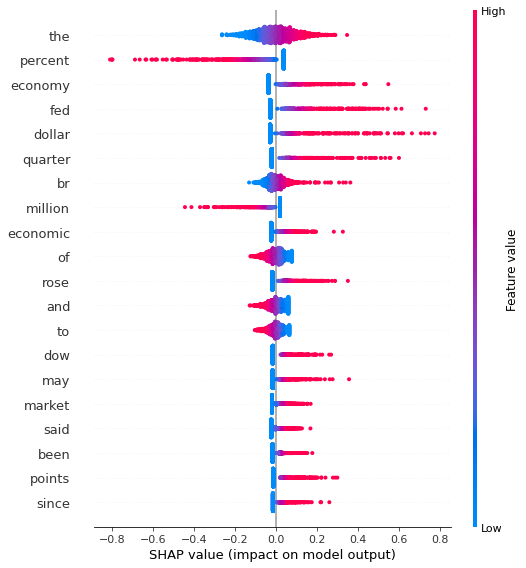

In [ ]:
shap.initjs
shap.summary_plot(shap_values, X_test_array, feature_names=vect.get_feature_names())

The SHAP value plot can further show the positive and negative relationships of the predictors with the target variable.

This plot is made of all the dots in the train data. It demonstrates the following information:

Feature importance: Variables are ranked in descending order from the most important decreasing to the least.
Impact: The horizontal location shows what effect the fature has with respect to prediction (higher or lower prediction).
Original value: Color shows whether that variable is high (in red) or low (in blue) for that observation.
Correlation: The presence of the word "dollar" has a high (positive) impact in deciding whether the article is relavent to the USA economy.

In [ ]:
shap.initjs()

shap.force_plot(
    explainer.expected_value, shap_values[0,:], X_test_array[0,:],
    feature_names=vect.get_feature_names()
)